/Users/ppruthi/research/compositional_models/compositional_models_cate/domains/synthetic_data/results/results_uniform_quadratic_parallel_covariates_shared_False_underlying_model_MLP
/Users/ppruthi/research/compositional_models/compositional_models_cate/domains/synthetic_data/results/results_uniform_quadratic_parallel_covariates_shared_False_underlying_model_MLP
/Users/ppruthi/research/compositional_models/compositional_models_cate/domains/synthetic_data/results/results_uniform_quadratic_parallel_covariates_shared_False_underlying_model_MLP
/Users/ppruthi/research/compositional_models/compositional_models_cate/domains/synthetic_data/results/results_uniform_quadratic_parallel_covariates_shared_False_underlying_model_MLP
/Users/ppruthi/research/compositional_models/compositional_models_cate/domains/synthetic_data/results/results_uniform_quadratic_parallel_covariates_shared_False_underlying_model_MLP
/Users/ppruthi/research/compositional_models/compositional_models_cate/domains/synthetic_d

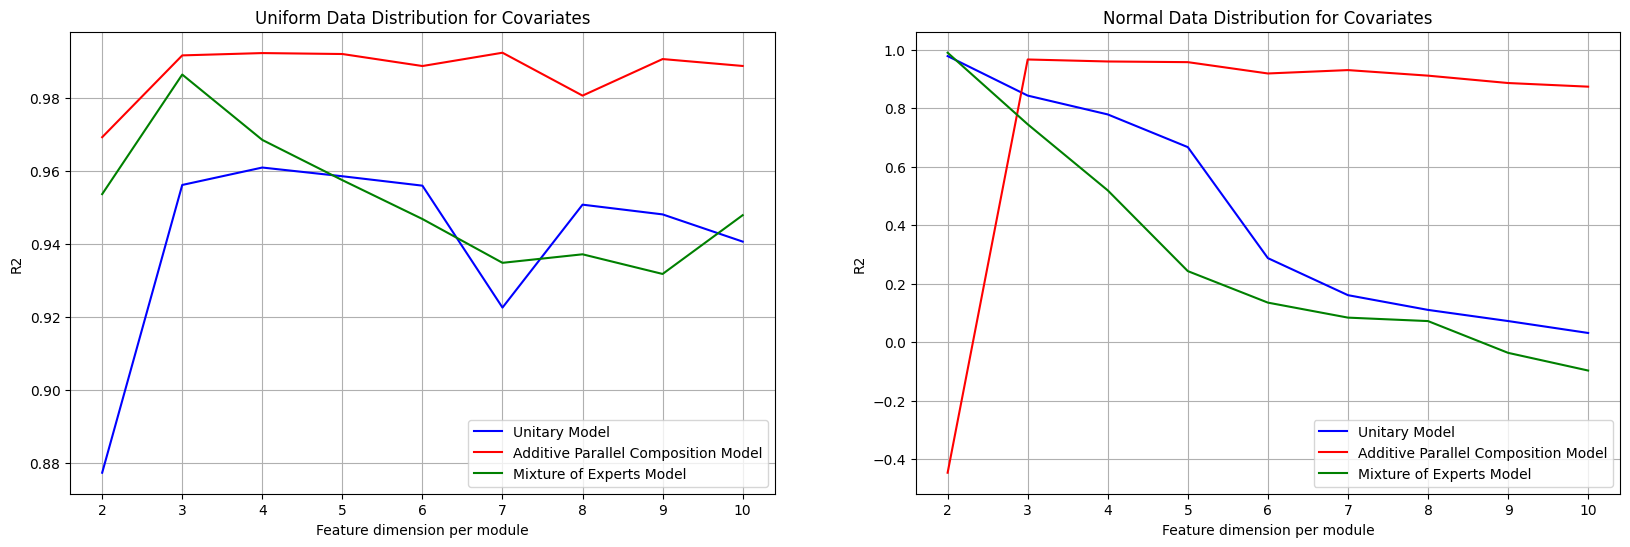

In [23]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
experiment = "feature_dim"
base_dir = "/Users/ppruthi/research/compositional_models/compositional_models_cate/domains"
data_dist = "normal"
module_function_type = "quadratic"
composition_type = "parallel"
covariates_shared = "False"
underlying_model_class = "MLP"
results_path = f"{base_dir}/synthetic_data/results/results_{data_dist}_{module_function_type}_{composition_type}_covariates_shared_{covariates_shared}_underlying_model_{underlying_model_class}"

# Lists to store the data for plotting
# heterogeneity_values = []


# print(num_modules_values)
# print(feature_dim_values)
# Collect data from result files
# have two side by side plots for each of the covariates_shared values
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
i = 0
for data_dist in ["uniform", "normal"]:
    if experiment == "num_modules":
        if covariates_shared == "True":
            num_modules_values = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
        else:
            num_modules_values = list(np.arange(1, 11))
        feature_dim_values = [10]
        varying_values = num_modules_values
    elif experiment == "feature_dim":
        if covariates_shared == "True":
            feature_dim_values = [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
        else:
            feature_dim_values = list(np.arange(2, 11))
        num_modules_values = [10]
    
    varying_values = feature_dim_values
    base_dir = "/Users/ppruthi/research/compositional_models/compositional_models_cate/domains"
    pehe_baseline_values = []
    pehe_additive_values = []
    pehe_moe_values = []
    for num_modules in num_modules_values:
        for feature_dim in feature_dim_values:
            results_file = f"{results_path}/results_{num_modules}_{feature_dim}.json"
            results_path = f"{base_dir}/synthetic_data/results/results_{data_dist}_{module_function_type}_{composition_type}_covariates_shared_{covariates_shared}_underlying_model_{underlying_model_class}"
            print(results_path)
            # print(f"Checking for {results_file}")
            if os.path.exists(results_file):
                # print(f"Reading results from {results_file}")
                with open(results_file, 'r') as f:
                    results = json.load(f)
                

                pehe_baseline_values.append(results['r2_baseline'])
                pehe_additive_values.append(results['r2_additive'])
                pehe_moe_values.append(results['r2_moe'])

    axs[i].plot(varying_values, pehe_baseline_values, 'b-', label='Unitary Model')    
    axs[i].plot(varying_values, pehe_additive_values, 'r-', label='Additive Parallel Composition Model')
    axs[i].plot(varying_values, pehe_moe_values, 'g-', label='Mixture of Experts Model')
    
    # axs[i].set_ylabel('PEHE (Precision in Estimation of Heterogeneous Effect)')
    axs[i].set_ylabel('R2')
    if covariates_shared == "True":
        axs[i].set_title(f'Shared covariates among modules')
        axs[i].set_xlabel(f'Feature Dimension per module')
    else:
        axs[i].set_title(f'Mutually exclusive covariates among modules')
        axs[i].set_xlabel(f'Feature dimension per module')

    if module_function_type == "linear":
        axs[i].set_title(f'Linear Module Function')
    elif module_function_type == "quadratic":
        axs[i].set_title(f'Quadratic Module Function')
    else:
        axs[i].set_title(f'MLP Module Function')

    if data_dist == "uniform":
        axs[i].set_title(f'Uniform Data Distribution for Covariates')
    else:
        axs[i].set_title(f'Normal Data Distribution for Covariates')
    
    
    axs[i].legend()
    axs[i].grid(True)
    i += 1
            # # Create the plot
            # plt.figure(figsize=(10, 6))
            # plt.plot(varying_values, pehe_baseline_values, 'b-', label='Unitary Model')
            # plt.plot(varying_values, pehe_additive_values, 'r-', label='Additive Parallel Composition Model')
            # plt.plot(varying_values, pehe_moe_values, 'g-', label='Mixture of Experts Model')

# plt.xlabel(f'{experiment}')
# plt.ylabel('PEHE (Precision in Estimation of Heterogeneous Effect)')
# plt.title(f'Performance vs {experiment}')
# plt.legend()
# plt.grid(True)
# plt.savefig(f"{results_path}/pehe_vs_{experiment}.png")

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

iid_line_1, = ax1.plot(iid_mean_1.index, iid_mean_1[col], label=label_names.get(col, col), color=label_colors.get(col, "black"), marker='o')
    # ood_line_1, = ax1.plot(ood_mean.index, ood_mean[col], color=label_colors.get(col, "black"), marker='o', linestyle='--')

    if col not in iid_mean.columns:
        continue
    iid_line, = ax2.plot(iid_mean.index, iid_mean[col], label=label_names.get(col, col), color=label_colors.get(col, "black"), marker='o')
    ood_line, = ax2.plot(ood_mean.index, ood_mean[col], color=label_colors.get(col, "black"), marker='o', linestyle='--')
    label_order.append(label_names.get(col, col))
    handles.append((iid_line, ood_line))

ax1.set_xlabel('Bias strength')
ax1.set_yscale('log', base=2)
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.yaxis.set_minor_formatter(ticker.NullFormatter())
ax1.set_ylabel('PEHE {} (log-scale)'.format(r'$\epsilon_{PEHE}$'))

ax2.set_xlabel('Bias strength')
ax2.set_yscale('log', base=2)
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax2.yaxis.set_minor_formatter(ticker.NullFormatter())
ax2.set_ylabel('PEHE {} (log-scale)'.format(r'$\epsilon_{PEHE}$'))

print(label_order)
print(linestyle_order)

model_legend = ax2.legend([h[0] for h in handles], label_order, loc='upper left', title='Models', bbox_to_anchor=(1.8, 1), frameon=False)

linestyle_legend_elements = [Line2D([0], [0], color='black', linestyle='-', label='IID'),
                             Line2D([0], [0], color='black', linestyle='--', label='OOD')]
linestyle_legend = ax2.legend(handles=linestyle_legend_elements, loc='upper left', title='Data', frameon=False)

ax2.add_artist(linestyle_legend)

plt.subplots_adjust(right=0.7)
plt.legend(handles=[iid_line_1], labels=label_order, loc='upper left', title='Models', bbox_to_anchor=(1.8, 1), frameon=False)
# plt.savefig("neurips_plots/fixed_structure_{}_parallel_outcomes_{}.pdf".format(fixed_structure, outcomes_parallel), bbox_inches='tight')
# plt.savefig("neurips_plots/fixed_structure_{}_parallel_outcomes_{}.png".format(fixed_structure, outcomes_parallel), bbox_inches='tight')